In [114]:
#This cell imports all of the modules/tools/etc that I need to use.
import numpy as np
from datascience import *
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

In [115]:
'''The cell below to loads the player and salary data that I will use for my sampling 
this is data from the years 2014-2015'''

player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")


player_data.show()
salary_data.show()
full_data.show()

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Anthony Davis,21,NOP,68,696,149,100,200,95,1656
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946
Jimmy Butler,25,CHI,65,379,212,114,36,93,1301
Damian Lillard,24,POR,82,378,507,97,21,222,1720
Russell Westbrook,26,OKC,67,488,574,140,14,293,1886
Pau Gasol,34,CHI,78,919,210,25,147,158,1446
Kyrie Irving,22,CLE,75,237,389,114,20,186,1628


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790
Carmelo Anthony,22458401
Dwight Howard,21436271
LeBron James,20644400
Chris Bosh,20644400
Chris Paul,20068563
Deron Williams,19754465
Rudy Gay,19317326


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156
Al Jefferson,13666667,30,CHO,65,548,113,47,84,68,1082
Al-Farouq Aminu,1100602,24,DAL,74,342,59,70,62,55,412
Alan Anderson,1276061,32,BRK,74,204,83,56,5,60,545
Alec Burks,3034356,23,UTA,27,114,82,17,5,52,374
Alex Kirk,507336,23,CLE,5,1,1,0,0,0,4


In [116]:
'''Given the overwhelming amount of data, I'll simplify it for my purposes, mainly to verify 
that the table has been successfully merged and cleaned. 
I'll achieve this by displaying only three rows for each value, as shown below.'''

player_data.show(3)
salary_data.show(3)
full_data.show(3)


Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


In [117]:
'''Since I am focusing on just the salary and age of each player I wanted to simplify the data more!'''

full_data = full_data.select(["PlayerName", "Salary", "Age"])
full_data.show(3)

PlayerName,Salary,Age
A.J. Price,62552,28
Aaron Brooks,1145685,30
Aaron Gordon,3992040,19


In [118]:
#I want to know who the top 10 players with the highest salary are.

sorted_data = full_data.sort("Salary", descending=True)
top_10_salaries = sorted_data.take(np.arange(10))
top_10_salaries.show()

PlayerName,Salary,Age
Kobe Bryant,23500000,36
Amar'e Stoudemire,23410988,32
Joe Johnson,23180790,33
Carmelo Anthony,22458401,30
Dwight Howard,21436271,29
Chris Bosh,20644400,30
LeBron James,20644400,30
Chris Paul,20068563,29
Deron Williams,19754465,30
Rudy Gay,19317326,28


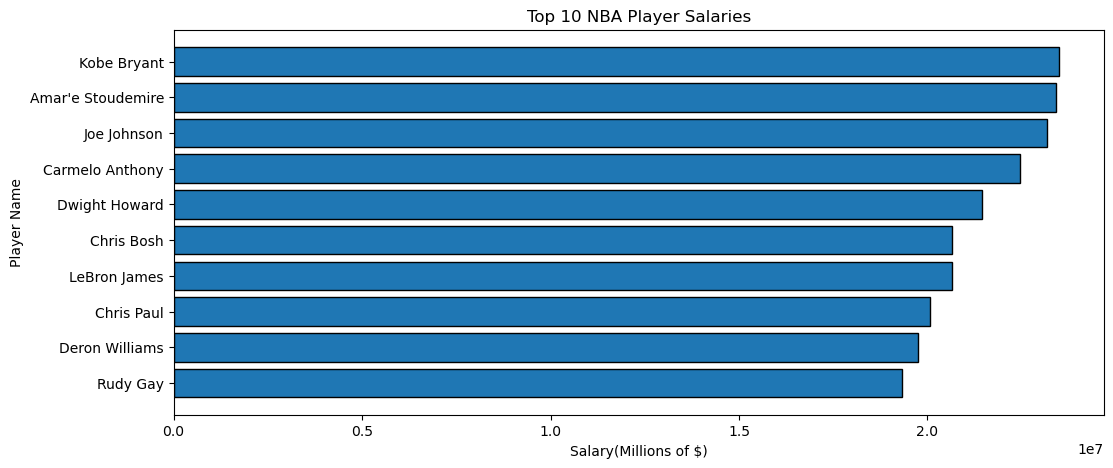

In [119]:
#A Bar chart is an effective way display for the top 10 players with the highest salary. 

players = top_10_salaries.column("PlayerName")
salaries = top_10_salaries.column("Salary")

plt.figure(figsize=(12, 5))
plt.barh(players, salaries)
plt.xlabel("Salary(Millions of $)")
plt.ylabel("Player Name")
plt.title("Top 10 NBA Player Salaries")
plt.gca().invert_yaxis() 
plt.show()



In [120]:
#Now I want to know who the  10 players with the lowest salary are.

sorted_data_lowest_salary = full_data.sort("Salary")
lowest_10_salaries = sorted_data_lowest_salary.take(np.arange(10))
lowest_10_salaries.show()


PlayerName,Salary,Age
Vander Blue,14409,22
Andre Dawkins,29843,23
David Stockton,29843,23
David Wear,29843,24
Sim Bhullar,29843,22
Jerrelle Benimon,35000,23
Sean Kilpatrick,35000,25
Arinze Onuaku,43226,27
Jabari Brown,44765,22
Jorge Gutierrez,48028,26


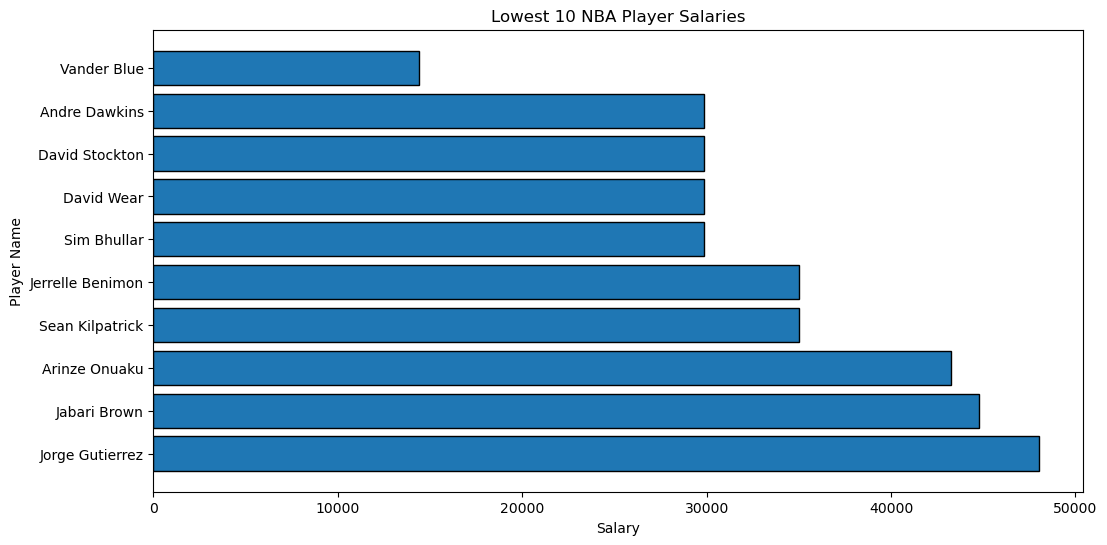

In [121]:
#This is a visualization of the bottom 10 players with the lowest salary.

l_players = lowest_10_salaries.column("PlayerName")
l_salaries = lowest_10_salaries.column("Salary")

plt.figure(figsize=(12, 6))
plt.barh(l_players, l_salaries)
plt.xlabel("Salary")
plt.ylabel("Player Name")
plt.title("Lowest 10 NBA Player Salaries")
plt.gca().invert_yaxis() 
plt.show()

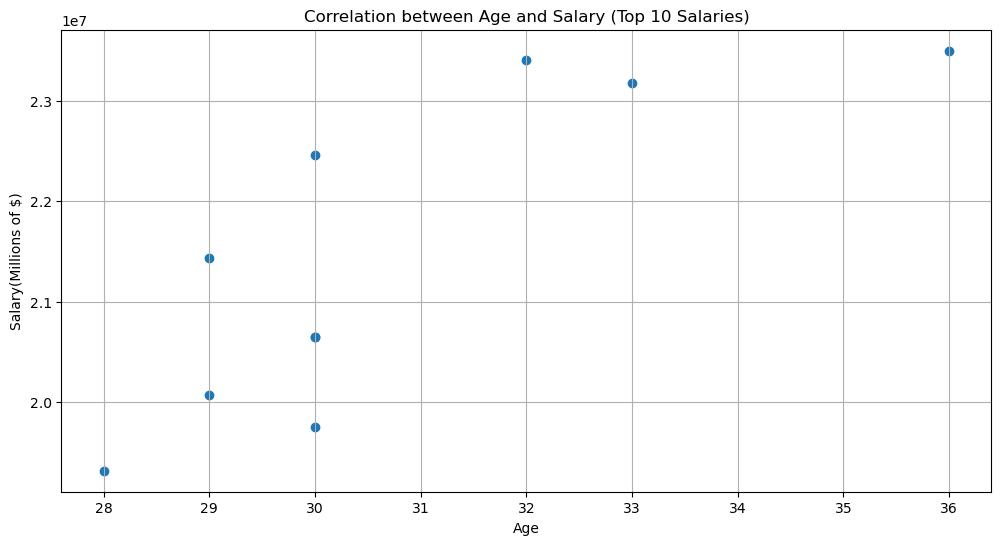

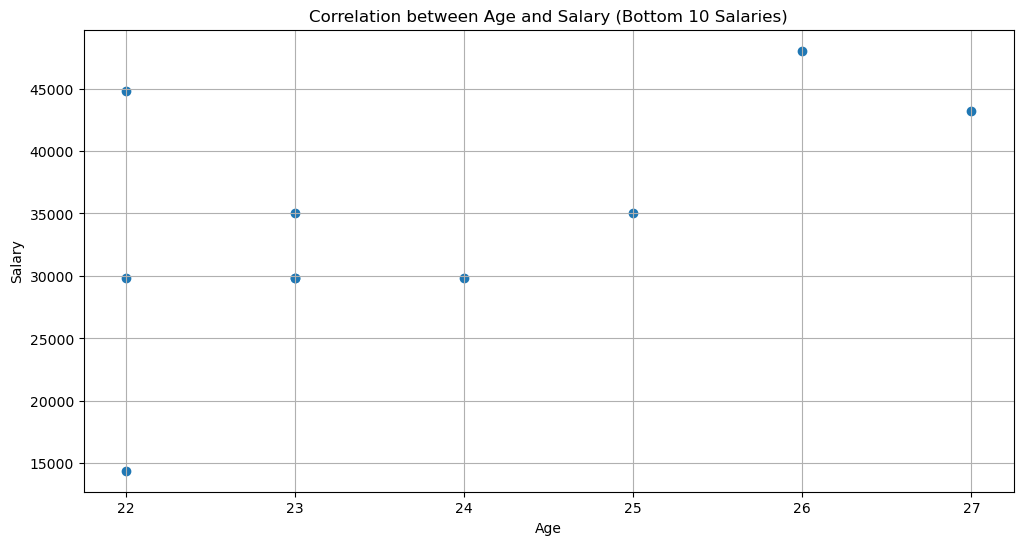

In [122]:
'''Before proceeding to calculate the correlation coefficients between age and the top 10 and bottom 10 salaries, 
it's important to generate scatterplots for a visual representation of the relationship between age and salary.'''

# This creates a scatter plot for the top 10 salaries
plt.figure(figsize=(12, 6))
plt.scatter(top_10_salaries.column("Age"), top_10_salaries.column("Salary"))
plt.xlabel("Age")
plt.ylabel("Salary(Millions of $)")
plt.title("Correlation between Age and Salary (Top 10 Salaries)")
plt.grid(True)
plt.show()

# This creates a scatter plot for the bottom 10 salaries
plt.figure(figsize=(12, 6))
plt.scatter(lowest_10_salaries.column("Age"), lowest_10_salaries.column("Salary"))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation between Age and Salary (Bottom 10 Salaries)")
plt.grid(True)
plt.show()


In [123]:
# This Calculates the correlation coefficient for the top 10 salaries:
top_10_correlation = np.corrcoef(top_10_salaries.column("Age"), top_10_salaries.column("Salary"))[0, 1]

# This one Calculate the correlation coefficient for the bottom 10 salaries:
lowest_10_correlation = np.corrcoef(lowest_10_salaries.column("Age"), lowest_10_salaries.column("Salary"))[0, 1]

# This prints out the correlation coefficients:
print("Correlation between age and top 10 salaries:", top_10_correlation)
print("Correlation between age and bottom 10 salaries:", lowest_10_correlation)


Correlation between age and top 10 salaries: 0.804788971373
Correlation between age and bottom 10 salaries: 0.581119405684


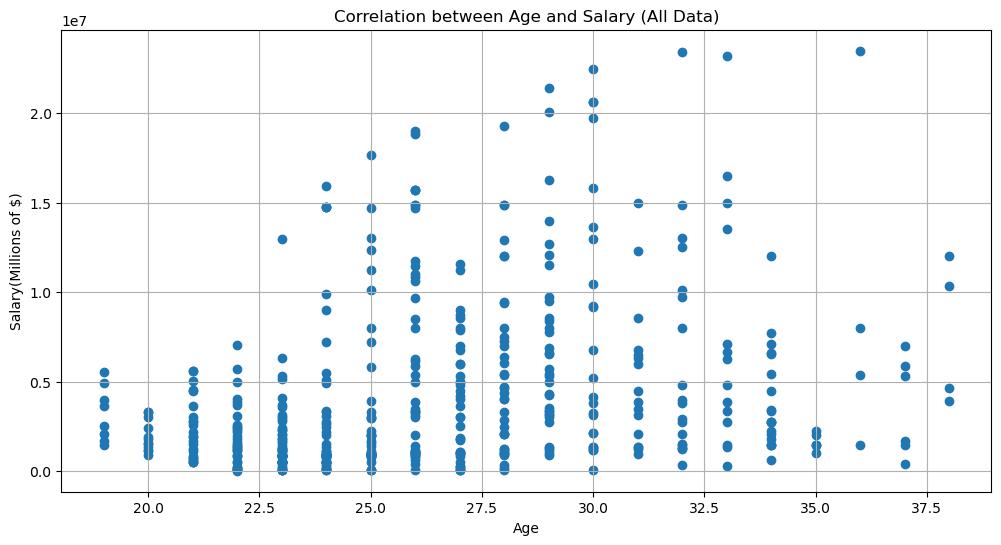

In [124]:
# Finally, I need to create a scatter plot for the entire dataset.
plt.figure(figsize=(12, 6))
plt.scatter(full_data.column("Age"), full_data.column("Salary"))
plt.xlabel("Age")
plt.ylabel("Salary(Millions of $)")
plt.title("Correlation between Age and Salary (All Data)")
plt.grid(True)
plt.show()


In [125]:
# Calculate the correlation coefficient for the entire dataset
correlation_all_data = np.corrcoef(full_data.column("Age"), full_data.column("Salary"))[0, 1]

# Display the correlation coefficient
print("Correlation between age and salary (All data):", correlation_all_data)


Correlation between age and salary (All data): 0.293369244797
